In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('covid-variants.csv')

In [3]:
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [5]:
df['variant'].unique(), df['variant'].nunique()

(array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
        'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
        'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
        'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
        'non_who'], dtype=object),
 24)

In [6]:
df['location'].nunique()

121

In [7]:
df['date'].nunique()

45

In [8]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


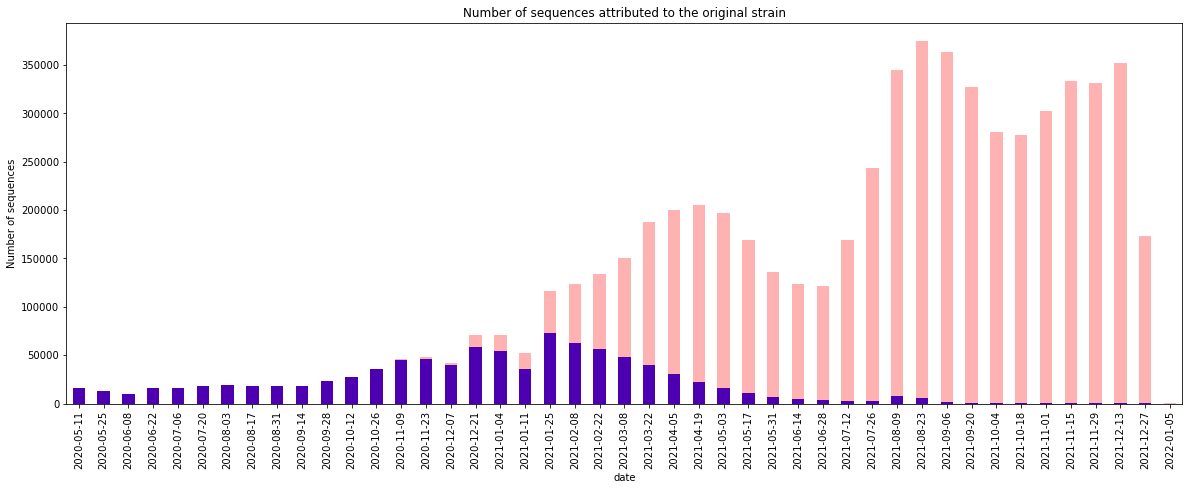

In [87]:
non_who = df.loc[df['variant']=='non_who']
y = non_who.groupby(['date'])['num_sequences'].sum()
z = non_who.groupby(['date'])['num_sequences_total'].sum()

fig, ax = plt.subplots(figsize=(20, 7))
y.plot(kind='bar', color='blue')
z.plot(kind='bar', color='red', alpha=0.3)
plt.ylabel('Number of sequences')
plt.title('Number of sequences attributed to the original strain');

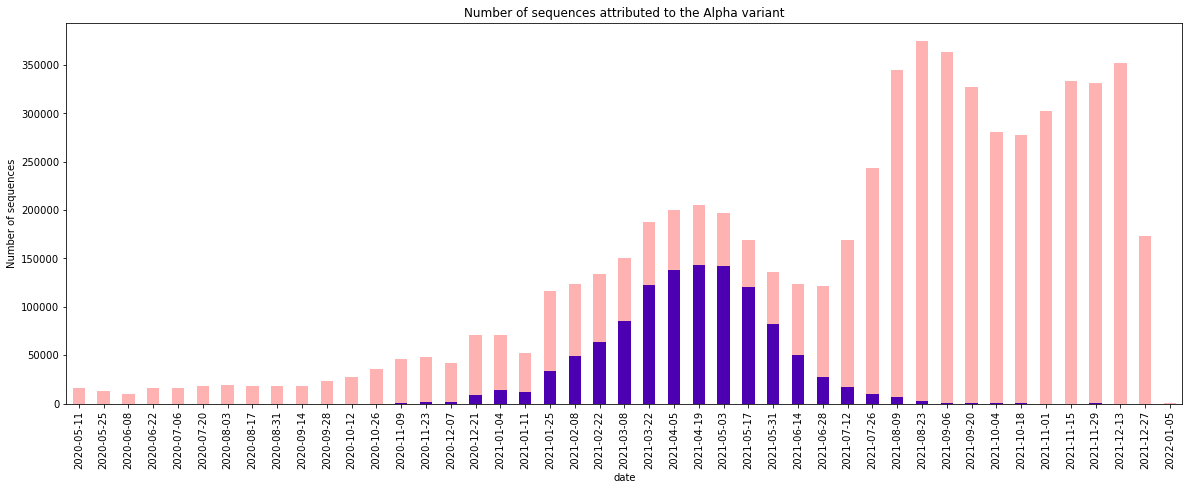

In [94]:
alpha = df.loc[df['variant']=='Alpha']
y = alpha.groupby(['date'])['num_sequences'].sum()
z = alpha.groupby(['date'])['num_sequences_total'].sum()

fig, ax = plt.subplots(figsize=(20, 7))
y.plot(kind='bar', color='blue')
z.plot(kind='bar', color='red', alpha=0.3)
plt.ylabel('Number of sequences')
plt.title('Number of sequences attributed to the Alpha variant');

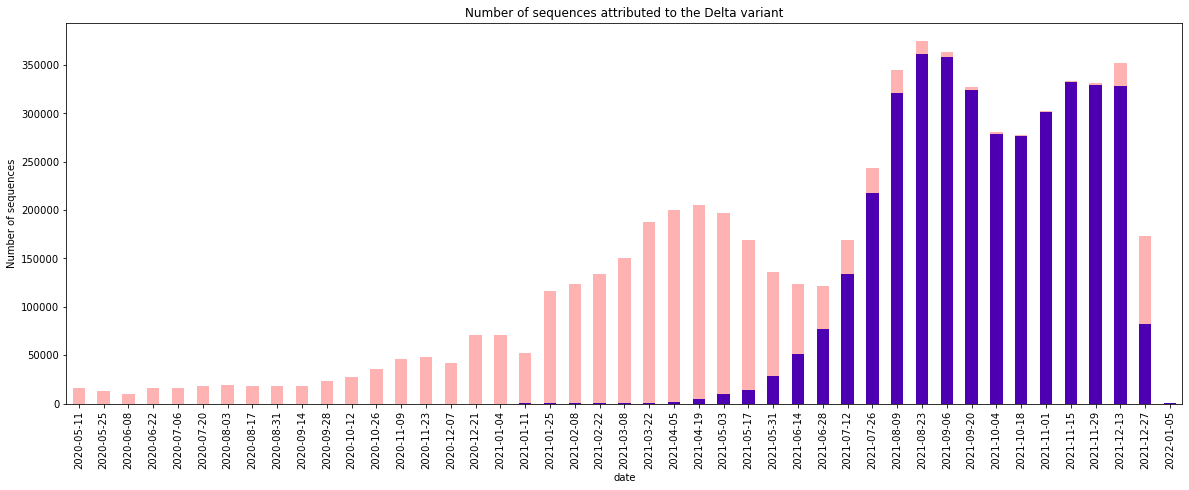

In [93]:
delta = df.loc[df['variant']=='Delta']
y = delta.groupby(['date'])['num_sequences'].sum()
z = delta.groupby(['date'])['num_sequences_total'].sum()

fig, ax = plt.subplots(figsize=(20, 7))
y.plot(kind='bar', color='blue')
z.plot(kind='bar', color='red', alpha=0.3)
plt.ylabel('Number of sequences')
plt.title('Number of sequences attributed to the Delta variant');

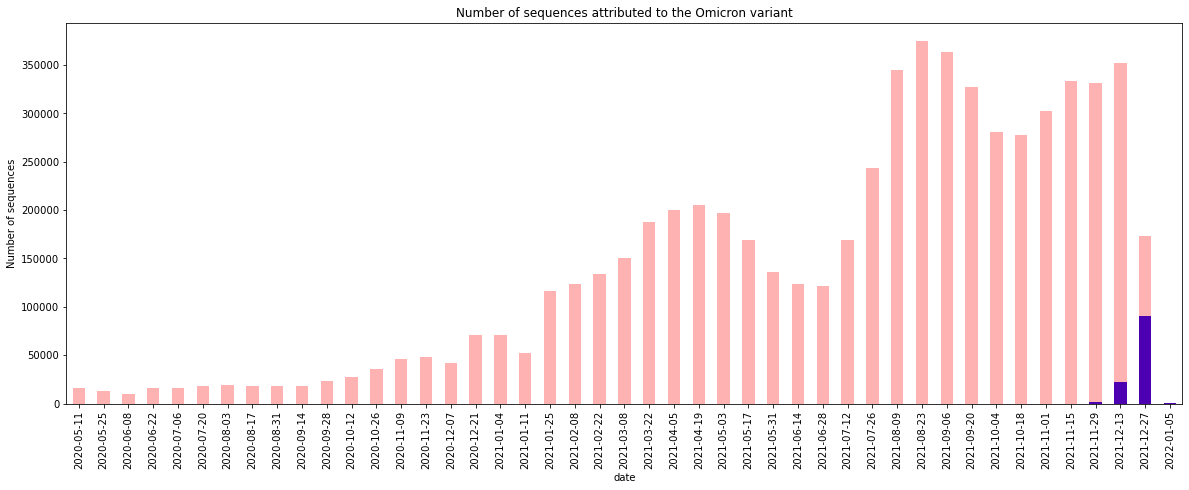

In [86]:
omicron = df.loc[df['variant']=='Omicron']
y = omicron.groupby(['date'])['num_sequences'].sum()
z = omicron.groupby(['date'])['num_sequences_total'].sum()

fig, ax = plt.subplots(figsize=(20, 7))
y.plot(kind='bar', color='blue')
z.plot(kind='bar', color='red', alpha=0.3)
plt.ylabel('Number of sequences')
plt.title('Number of sequences attributed to the Omicron variant');

In [99]:
df_pivot = df.pivot_table(values='perc_sequences', index='date', columns='variant')
df_pivot.index = pd.to_datetime(df_pivot.index)
df_pivot.head()

variant,Alpha,B.1.1.277,B.1.1.302,B.1.1.519,B.1.160,B.1.177,B.1.221,B.1.258,B.1.367,B.1.620,...,Gamma,Iota,Kappa,Lambda,Mu,Omicron,S:677H.Robin1,S:677P.Pelican,non_who,others
date,,,,,,,,,,,,,,,,,,,,,
2020-05-11,0.0,0.0,0.0,0.0,0.0,0.012821,0.000000,0.038846,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,99.948333
2020-05-25,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.091944,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,99.908056
2020-06-08,0.0,0.0,0.0,0.0,0.0,0.031282,0.000000,0.071282,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,99.897436
2020-06-22,0.0,0.0,0.0,0.0,0.0,0.134304,0.064557,0.148861,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,99.652278
2020-07-06,0.0,0.0,0.0,0.0,0.0,0.718919,0.034595,1.419054,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,97.827432


In [100]:
df_pivot.index

DatetimeIndex(['2020-05-11', '2020-05-25', '2020-06-08', '2020-06-22',
               '2020-07-06', '2020-07-20', '2020-08-03', '2020-08-17',
               '2020-08-31', '2020-09-14', '2020-09-28', '2020-10-12',
               '2020-10-26', '2020-11-09', '2020-11-23', '2020-12-07',
               '2020-12-21', '2021-01-04', '2021-01-11', '2021-01-25',
               '2021-02-08', '2021-02-22', '2021-03-08', '2021-03-22',
               '2021-04-05', '2021-04-19', '2021-05-03', '2021-05-17',
               '2021-05-31', '2021-06-14', '2021-06-28', '2021-07-12',
               '2021-07-26', '2021-08-09', '2021-08-23', '2021-09-06',
               '2021-09-20', '2021-10-04', '2021-10-18', '2021-11-01',
               '2021-11-15', '2021-11-29', '2021-12-13', '2021-12-27',
               '2022-01-05'],
              dtype='datetime64[ns]', name='date', freq=None)

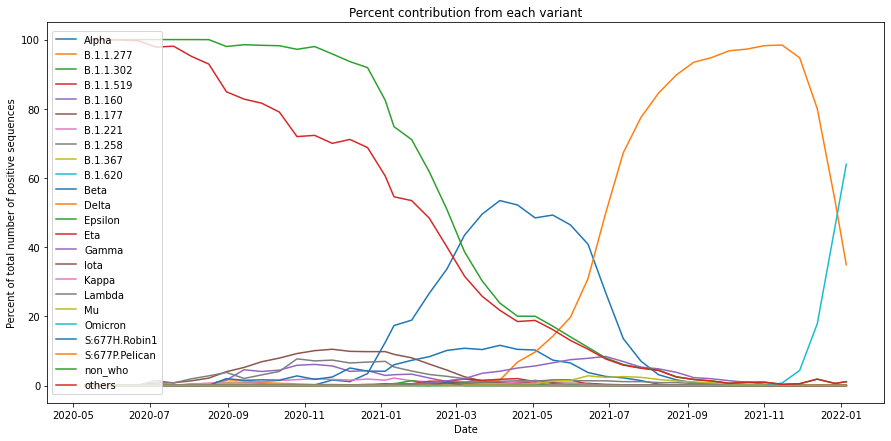

In [104]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(df_pivot)
plt.legend(df_pivot.columns, loc='center left')
plt.xlabel('Date')
plt.ylabel('Percent of total number of positive sequences')
plt.title('Percent contribution from each variant');

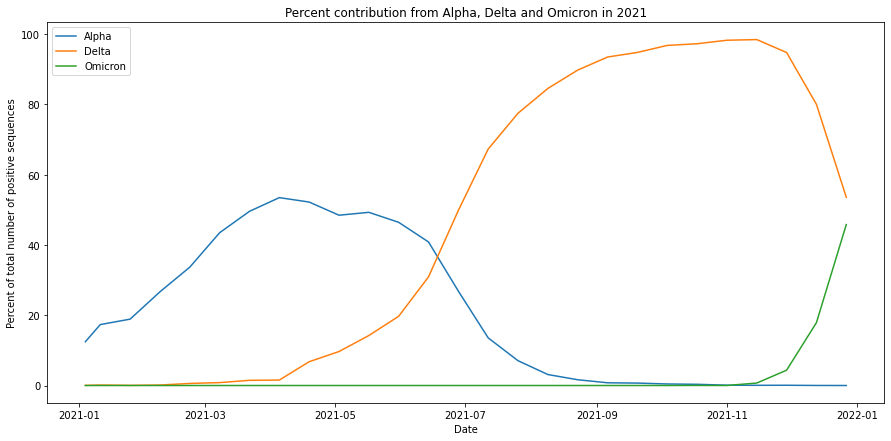

In [115]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(df_pivot.loc['2021-01':'2021-12', labels])
plt.legend(labels, loc='upper left')
plt.xlabel('Date')
plt.ylabel('Percent of total number of positive sequences')
plt.title('Percent contribution from Alpha, Delta and Omicron in 2021');

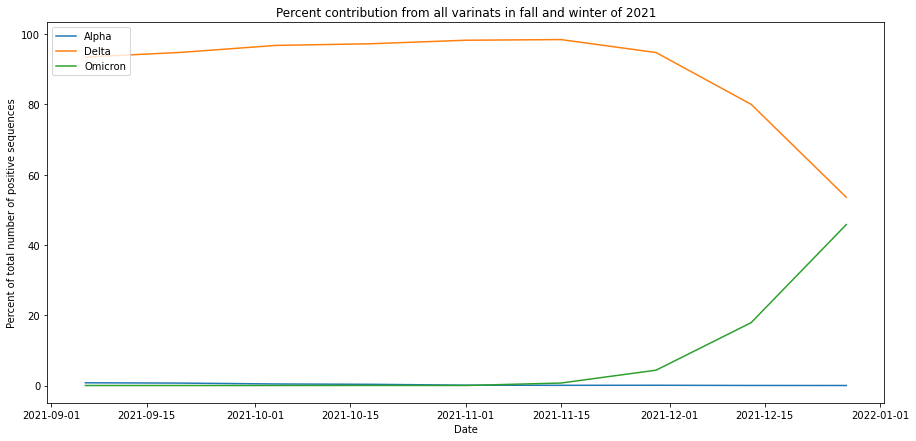

In [113]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(df_pivot.loc['2021-09':'2021-12', labels])
plt.legend(labels, loc='upper left')
plt.xlabel('Date')
plt.ylabel('Percent of total number of positive sequences')
plt.title('Percent contribution from all varinats in fall and winter of 2021');

In [129]:
df_pivot2 = df.pivot_table(values='num_sequences', index='date', columns='variant', aggfunc=['sum'])
df_pivot2.index = pd.to_datetime(df_pivot2.index, errors='coerce')
df_pivot2.head()

sum                                                        \
variant    Alpha B.1.1.277 B.1.1.302 B.1.1.519 B.1.160 B.1.177 B.1.221   
date                                                                     
2020-05-11     0         0         0         0       0       2       0   
2020-05-25     0         0         0         0       0       0       0   
2020-06-08     0         0         0         0       0       2       0   
2020-06-22     0         0         0         0       0       8       5   
2020-07-06     0         0         0         0       0      72       1   

                                    ...                                     \
variant    B.1.258 B.1.367 B.1.620  ... Gamma Iota Kappa Lambda Mu Omicron   
date                                ...                                      
2020-05-11       1       0       0  ...     0    0     0      0  0       0   
2020-05-25       2       0       0  ...     0    0     0      0  0       0   
2020-06-08       1       0       0  ...     0    0     0      0  0       0   
2020-06-22       2       0       0  ...     0    0     0      0  0       0   
2020-07-06      15       0       0  ...     0    0     0      0  0       0   

                                                        
variant    S:677H.Robin1 S:677P.Pelican non_who others  
date                                                    
2020-05-11             0              0   16436  16433  
2020-05-25             0              0   12903  12901  
2020-06-08             0              0    9660   9657  
2020-06-22             0              0   16160  16145  
2020-07-06             0              0   15764  15676  

[5 rows x 24 columns]

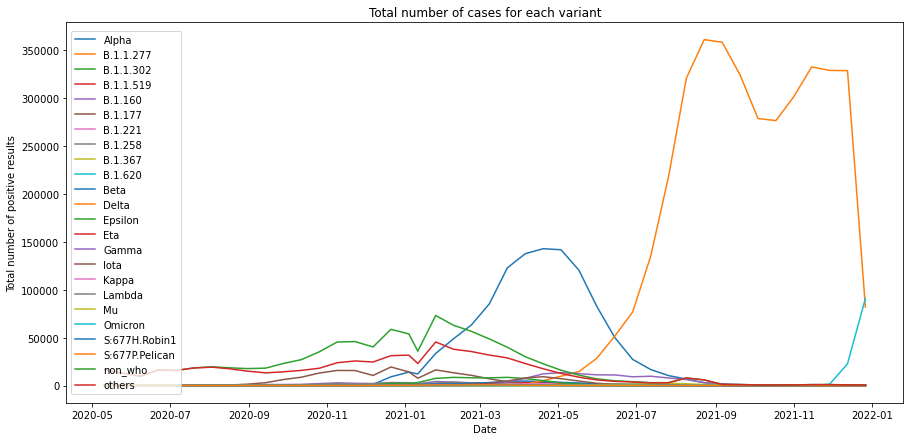

In [156]:
legend = [df_pivot2.columns[i][1] for i in np.arange(24)]

fig, ax = plt.subplots(figsize=(15,7))
plt.plot(df_pivot2.loc['2020':'2021'])
plt.legend(leg, loc='center left')
plt.xlabel('Date')
plt.ylabel('Total number of positive results')
plt.title('Total number of cases for each variant');

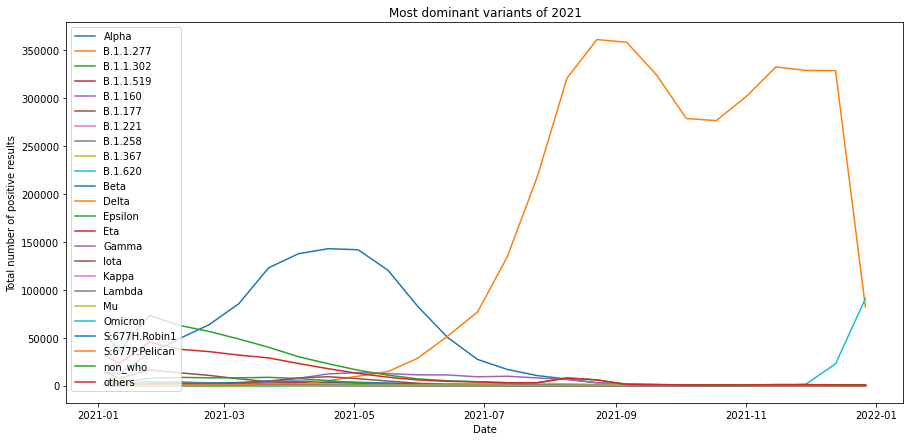

In [158]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(df_pivot2.loc['2021-01':'2021-12'])
plt.legend(legend, loc='upper left')
plt.xlabel('Date')
plt.ylabel('Total number of positive results')
plt.title('Most dominant variants of 2021');

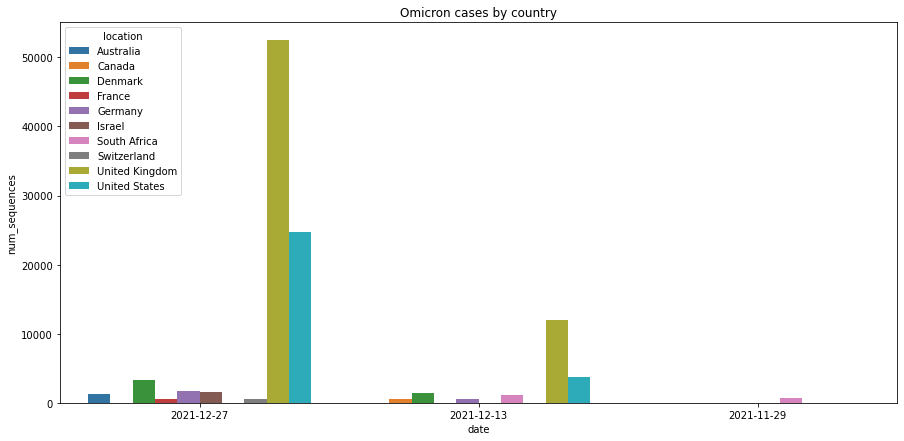

In [575]:
omicron_21 = df.loc[(df['date'] >='2021-08') & (df['date']<'2022') & (df['num_sequences'] > 500) & (df['variant']=='Omicron')]

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='date',y='num_sequences', data=omicron_21, hue='location', ci=None)
plt.title('Omicron cases by country');

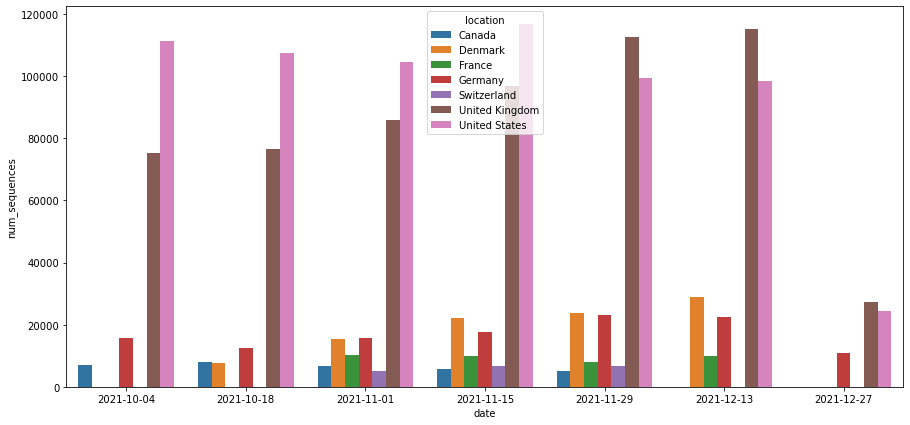

In [552]:
delta_21 = df.loc[(df['date'] >='2021-10') & (df['date']<'2022') & (df['num_sequences'] > 5000) & (df['variant']=='Delta')]
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='date',y='num_sequences', data=delta_21, hue='location', ci=None);

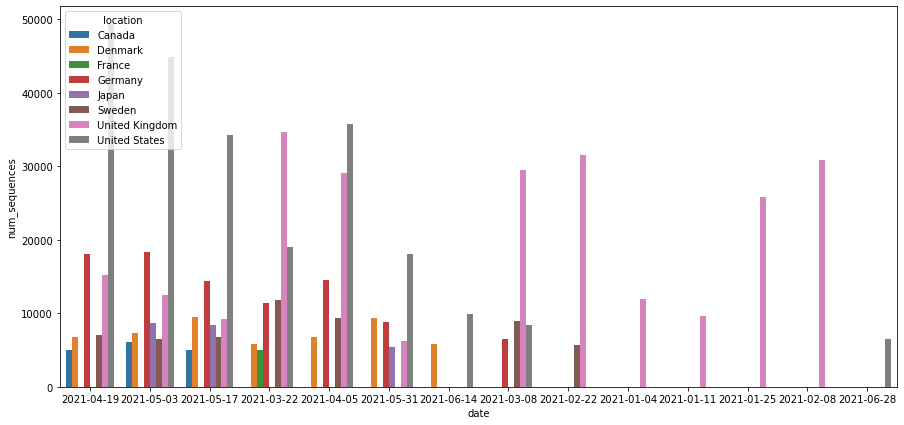

In [549]:
alpha_21 = df.loc[(df['date'] >='2021-01') & (df['date']<'2022') & (df['num_sequences'] > 5000) & (df['variant']=='Alpha')]
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='date',y='num_sequences', data=alpha_21, hue='location', ci=None);

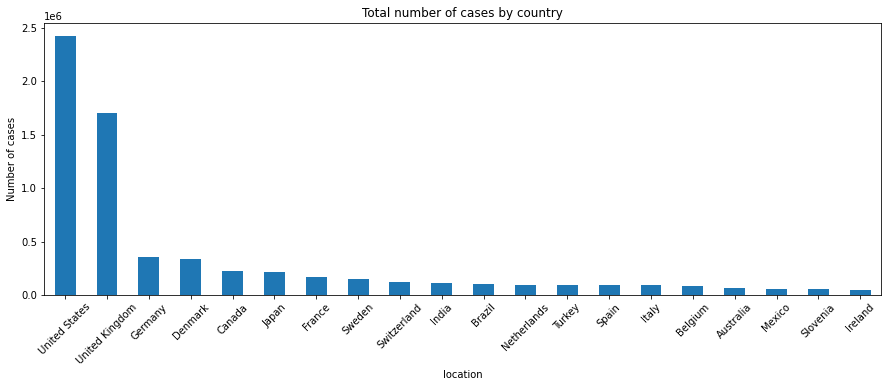

In [621]:
fig, ax=plt.subplots(figsize=(15,5))
df.groupby('location')['num_sequences'].sum().sort_values(ascending=False)[:20].plot(kind='bar',rot=45)
plt.ylabel('Number of cases')
plt.title('Total number of cases by country');

In [603]:
df['num_sequences_total'][df['location']=='United States'].max()

146170